The following notebook is Spam and Ham SMS classification where I first cleaned the data and further converted the data into number(vectors) using Count Vectorizer because Machine Learning Model doesn't understand texts. After converting the data into numbers I used models like Logistic Regression,Naive Bayes and Pytorch to classify the ham and spam SMS.



###Data Cleaning and Preprocessing :

In [ ]:
#Importing Useful Libraries
import pandas as pd
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('spam.csv',encoding='latin-1') #Reading the Data

In [ ]:
df.head(10)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
df.dropna(how="any", inplace=True, axis=1) #Dropping Useless Columns which are not required

In [ ]:
df.sample(20)

,v1,v2
822,spam,"SMSSERVICES. for yourinclusive text credits, p..."
111,ham,Going for dinner.msg you after.
541,ham,A famous quote : when you develop the ability ...
2226,ham,If you have belive me. Come to my home.
560,ham,Hi msg me:)i'm in office..
2020,ham,Anything lor but toa payoh got place 2 walk me...
3343,ham,Oh great. I.ll disturb him more so that we can...
4260,ham,Pls dont forget to study
4233,ham,Now only i reached home. . . I am very tired n...
2080,ham,Where is it. Is there any opening for mca.


In [ ]:
df.columns=['label','SMS'] #Giving Columns a Proper Name Like 'label' & 'SMS'
df.head(10)

,label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
df.isna().sum() #Checking NUll Values

label    0
SMS      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.value_counts('label') #Checking the Count of Spam and Ham SMS

label
ham     4825
spam     747
dtype: int64

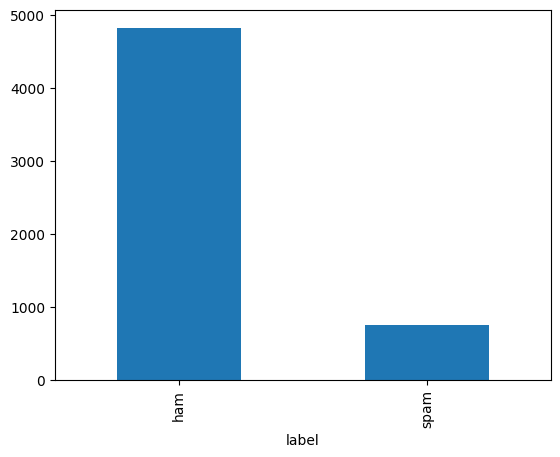

In [ ]:
df.value_counts('label').plot(kind='bar');

In [ ]:
df['label'] = df['label'].replace({'ham': 0,'spam': 1}) #Converting 'ham' and 'spam' into numbers because ML Models doesn't understand texts.

In [ ]:
df.head()

,label,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.model_selection import train_test_split #Splitting the Data Into training and testing sets

In [ ]:
train_inputs,test_inputs,train_targets,test_targets=train_test_split(df.SMS,df.label,test_size=0.2,random_state=42)

In [ ]:
train_inputs.shape,train_targets.shape

((4457,), (4457,))

In [ ]:
test_inputs.shape,test_targets.shape

((1115,), (1115,))

###Converting Text into Numbers :

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vector=CountVectorizer()
train_input_count=vector.fit_transform(train_inputs)
test_input_count=vector.transform(test_inputs).toarray()

In [ ]:
train_input_count.shape

(4457, 7735)

In [ ]:
test_input_count.shape

(1115, 7735)

In [ ]:
train_input_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

###Logistic Regression :

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_log=LogisticRegression()

In [ ]:
model_log.fit(train_input_count,train_targets)

LogisticRegression()

In [ ]:
log_train_pred=model_log.predict(train_input_count)
log_train_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets,log_train_pred)

0.9984294368409243

In [ ]:
log_test_pred=model_log.predict(test_input_count)

In [ ]:
accuracy_score(test_targets,log_test_pred)

0.97847533632287

In [ ]:
model_log=LogisticRegression(solver='liblinear')

In [ ]:
model_log.fit(train_input_count,train_targets)

LogisticRegression(solver='liblinear')

In [ ]:
log_train_pred=model_log.predict(train_input_count)
log_train_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(train_targets,log_train_pred)

0.9984294368409243

In [ ]:
log_test_pred=model_log.predict(test_input_count)

In [ ]:
accuracy_score(test_targets,log_test_pred)

0.97847533632287

###Navie Bayes :

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model=MultinomialNB()

In [ ]:
model.fit(train_input_count,train_targets)

MultinomialNB()

In [ ]:
model.score(train_input_count,train_targets)

0.9943908458604442

In [ ]:
model.score(test_input_count,test_targets)

0.9838565022421525

##Pytorch :

In [ ]:
import torch
from torch import nn

device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

X_train,X_test,y_train,y_test=train_test_split(df['SMS'],df['label'], test_size=0.2)

vectorizer = CountVectorizer(lowercase=True)
vectorizer.fit(df["SMS"])

X_train_vec=vectorizer.transform(X_train)
X_test_vec=vectorizer.transform(X_test)

In [ ]:
print(X_train_vec.shape),print(X_test_vec.shape)

(4457, 8672)
(1115, 8672)


(None, None)

In [ ]:
X_train_tensor = torch.from_numpy(X_train_vec.todense()).float()
X_test_tensor = torch.from_numpy(X_test_vec.todense()).float()
Y_train_tensor = torch.from_numpy(np.array(y_train))
Y_test_tensor = torch.from_numpy(np.array(y_test))

In [ ]:
from torch.utils.data import Dataset, TensorDataset
from torch.utils.data import DataLoader

In [ ]:
train_data=TensorDataset(X_train_tensor,Y_train_tensor)
test_data=TensorDataset(X_test_tensor,Y_test_tensor)

In [ ]:
train_data[0]

(tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(0))

In [ ]:
train_dataloader=DataLoader(train_data,batch_size=32,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=32,shuffle=False)

In [ ]:
next(iter(train_dataloader))

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 1, 0, 0, 0, 0, 1, 1])]

In [ ]:
next(iter(test_dataloader))

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0])]

In [ ]:
class Network(nn.Module):
  def __init__(self,vacob_size,hidden_units,num_classes):
    super().__init__()
    self.layer_1=nn.Linear(vacob_size,hidden_units)
    self.layer_2=nn.Linear(hidden_units,num_classes)
    self.relu=nn.ReLU()
    self.output=nn.Sigmoid()

  def forward(self,x):
    x=self.layer_1(x)
    x=self.relu(x)
    x=self.layer_2(x)
    x=self.relu(x)
    x=self.output(x)
    return x[:,-1]

In [ ]:
NUM_EPOCHS=5
VACOB_SIZE=8672
HIDDEN_UNITS=5
OUT_CLASSES=1

In [ ]:
Model=Network(VACOB_SIZE,HIDDEN_UNITS,OUT_CLASSES)

In [ ]:
loss_fn=nn.BCEWithLogitsLoss() #BCEWithLogitsLoss = sigmoid built-in

#Create an optimizer
optimizer=torch.optim.SGD(params=Model.parameters(),
                          lr=0.01)

In [ ]:
for i in range(NUM_EPOCHS):
  for x_batch,y_batch in train_dataloader:
    Model.train()
    y_pred = Model(x_batch)
    loss = loss_fn(y_pred,y_batch.float())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  print('After {} epoch training loss is {}'.format(i,loss.item()))

After 0 epoch training loss is 0.9185215830802917
After 1 epoch training loss is 0.7518547773361206
After 2 epoch training loss is 0.862966001033783
After 3 epoch training loss is 0.807410478591919
After 4 epoch training loss is 0.9185215830802917


In [ ]:
class SpamChecker(nn.Module):
  def __init__(self,vacob_size,hidden_units,num_classes):
    super().__init__()
    self.layer_1=nn.Linear(in_features=vacob_size,out_features=hidden_units)
    self.layer_2=nn.Linear(in_features=vacob_size,out_features=hidden_units)
    self.layer_3=nn.Linear(in_features=hidden_units,out_features=num_classes)
    self.relu=nn.ReLU()

  def forward (self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

Model1=Network(VACOB_SIZE,HIDDEN_UNITS,OUT_CLASSES)

In [ ]:
loss_fn=nn.BCEWithLogitsLoss() #BCEWithLogitsLoss = sigmoid built-in

#Create an optimizer
optimizer=torch.optim.Adam(params=Model1.parameters(),
                          lr=0.001)

In [ ]:
for i in range(NUM_EPOCHS):
  for x_batch,y_batch in train_dataloader:
    Model1.train()
    y_pred = Model1(x_batch)
    loss = loss_fn(y_pred,y_batch.float())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  print('After {} epoch training loss is {}'.format(i,loss.item()))

After 0 epoch training loss is 0.9740771055221558
After 1 epoch training loss is 0.9185215830802917
After 2 epoch training loss is 0.862966001033783
After 3 epoch training loss is 0.9185215830802917
After 4 epoch training loss is 0.8629658818244934


###Conclusion :

The following conclusion can be made :



*   All the Models are Performing Well.
*   Naive Bayes has Good Accuracy as compared to others.
*   Pytorch Model is not performing because it requires huge data.
*   We have Data imbalance but it not effecting much more are able to get 98% Accuracy which is good so I didn't used oversampling techniques.

